In [3]:
from keras._tf_keras.keras.preprocessing.text import Tokenizer
from keras._tf_keras.keras.preprocessing.sequence import pad_sequences
from keras._tf_keras.keras.models import Sequential
from keras._tf_keras.keras.layers import Embedding, LSTM, Dense

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import re
import string

ModuleNotFoundError: No module named 'tensorflow'

# Methods

In [13]:
def load_stop_words(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        stop_words = set(file.read().splitlines())
    return stop_words

## Dataset

In [14]:
dataset = pd.read_json("dataset\Turkish_data_depository_630koseyazisi.jsonl",lines=True)
print(dataset.head(10))
print(dataset.info())

  writer  file_id                                             column
0    ttu       27  O zaman 28 Şubat neden yapıldı?  \r\n     \r\n...
1    ttu       28  O zaman 28 Şubat neden yapıldı?  \r\n     \r\n...
2    ttu        3  Cumhuriyetin en kritik yerel seçimi \r\nMURAT ...
3    ttu        4  Çekilin artık kamera karşısından \r\nHER kar y...
4    ttu       23  Lorant'ın heyecan veren hedefi  \r\n     \r\n\...
5    ttu       14  Gerçekten de gülüp geçilecek bir öneri \r\nGAZ...
6    ttu       13  Mercedes çeşitlemeleri \r\nTÜRK insanı, Merced...
7    ttu       31  Yazarın çilesi  \r\n     \r\n\r\n  \r\nZAMAN z...
8    ttu       19  Tüm yazı konularını silip süpüren fotoğraf \r\...
9    ttu       11  Şarkta böyledir bu işler...  \r\n     \r\nttu...
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 630 entries, 0 to 629
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   writer   630 non-null    object
 1   file_id  630 non-null

In [15]:
x = dataset.iloc[:, 2].values.astype("str") # author text
y = dataset.iloc[:, 0].values.astype("str") # author name

print(f"type x : {type(x)} , type y : {type(y)}")

type x : <class 'numpy.ndarray'> , type y : <class 'numpy.ndarray'>


In [16]:
# turkish stop words
stop_words =  load_stop_words("stopwordsTR\stopwords.txt")

# Her bir metni temizleme işlemi
for i in range(len(x)):
    # Convert to lowercase - Küçük harfe çevirme
    x[i] = x[i].lower()
    
    # Remove escape characters - Kaçış karakterlerini kaldırma
    x[i] = re.sub(r'[\r\n]', ' ', x[i]) 
    
    # Remove unnecessary characters - Gereksiz karakterleri kaldırma
    x[i] = re.sub(r'[^a-zA-ZğüşıöçĞÜŞİÖÇ\s]', '', x[i])
    
    # Remove stop words - Stop kelimeleri kaldırma
    x[i] = ' '.join([word for word in x[i].split() if word not in stop_words])
    
    # Remove punctuation marks - Noktalama işaretlerini kaldırma
    x[i] = x[i].translate(str.maketrans('', '', string.punctuation))
    
    # Remove repeating spaces - Tekrar eden boşlukları kaldırma
    x[i] = re.sub(r'\s+', ' ', x[i])

# LSTM Model

In [17]:
# Tokenizer'ı oluşturma
tokenizer = Tokenizer()
tokenizer.fit_on_texts(x)

# Metin verilerini sayısal dizilere dönüştürme
x_sequences = tokenizer.texts_to_sequences(x)

# Metin dizilerini sabit bir uzunlukta yapma
maxlen = 100
x_sequences = pad_sequences(x_sequences, maxlen=maxlen)

# Etiketleri sayısal değerlere dönüştürme
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Eğitim ve test setlerine ayırma
x_train, x_test, y_train, y_test = train_test_split(x_sequences, y_encoded, test_size=0.2, random_state=42)

# LSTM modeli oluşturma
lstm_model = Sequential()
lstm_model.add(Embedding(input_dim=len(tokenizer.word_index)+1, output_dim=100, input_length=maxlen))
lstm_model.add(LSTM(100))
lstm_model.add(Dense(len(label_encoder.classes_), activation='softmax'))

# Modeli derleme
lstm_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Modeli eğitme
lstm_model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))


Epoch 1/10


c:\Users\Umitk\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


16/16 ━━━━━━━━━━━━━━━━━━━━ 6s 151ms/step - accuracy: 0.0808 - loss: 2.8907 - val_accuracy: 0.0873 - val_loss: 2.8907
Epoch 2/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 122ms/step - accuracy: 0.5168 - loss: 2.8578 - val_accuracy: 0.0794 - val_loss: 2.8831
Epoch 3/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 132ms/step - accuracy: 0.5516 - loss: 2.6634 - val_accuracy: 0.1508 - val_loss: 2.7779
Epoch 4/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 145ms/step - accuracy: 0.3834 - loss: 2.3849 - val_accuracy: 0.1667 - val_loss: 2.6608
Epoch 5/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 139ms/step - accuracy: 0.6148 - loss: 1.8970 - val_accuracy: 0.2222 - val_loss: 2.5132
Epoch 6/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 158ms/step - accuracy: 0.7355 - loss: 1.4209 - val_accuracy: 0.1984 - val_loss: 2.5838
Epoch 7/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 131ms/step - accuracy: 0.8903 - loss: 0.9967 - val_accuracy: 0.3175 - val_loss: 2.4381
Epoch 8/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 123ms/step - accuracy: 0.9312 - loss: 0.6358 - val_accuracy: 0.2540 - val_

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.2454 - loss: 2.3507
Accuracy: 0.2698412835597992


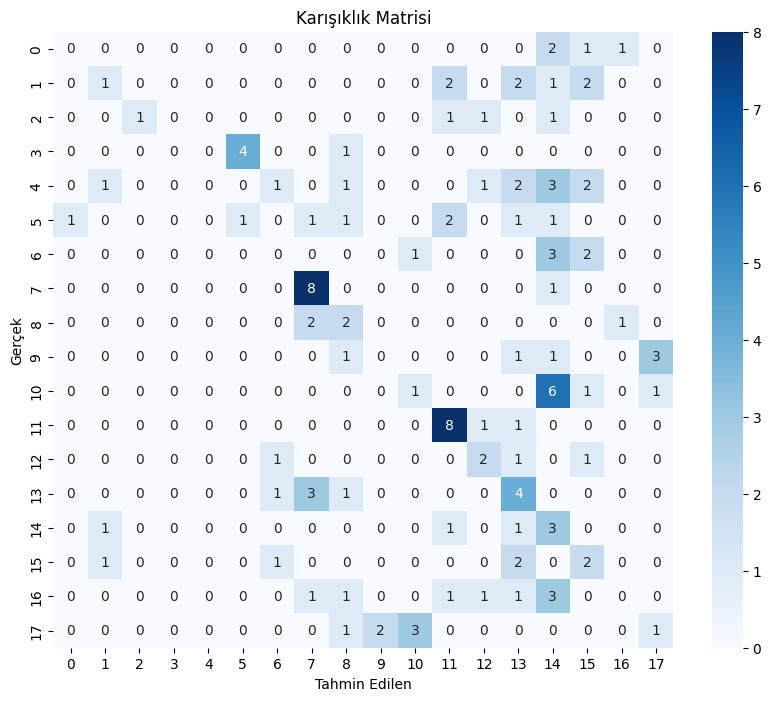

In [24]:
y_pred = lstm_model.predict(x_test)

accuracy = lstm_model.evaluate(x_test, y_test)[1]
print(f"Accuracy: {accuracy}")

# Karışıklık matrisini hesaplama ve görselleştirme
conf_matrix = confusion_matrix(y_test, np.argmax(y_pred, axis=1))
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Tahmin Edilen')
plt.ylabel('Gerçek')
plt.title('Karışıklık Matrisi')
plt.show()


In [1]:
# Veri setini eğitim ve test olarak ayırma
x_train, x_test, y_train, y_test = train_test_split(x_sequences, y_encoded, test_size=0.2, random_state=42)

# LSTM modeli oluşturma
lstm_model = Sequential()
lstm_model.add(Embedding(input_dim=len(tokenizer.word_index)+1, output_dim=100, input_length=maxlen))
lstm_model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))  # LSTM katmanı, dropout eklenerek iyileştirildi
lstm_model.add(Dense(len(label_encoder.classes_), activation='softmax'))

# Modeli derleme
lstm_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Modeli eğitme
history = lstm_model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))

# Eğitim sürecinin görselleştirilmesi
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()



KeyboardInterrupt

